In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-darkgrid') # A nice dark grid style
plt.rcParams['figure.figsize'] = (12, 6) # Default figure size
plt.rcParams['lines.linewidth'] = 2 # Default line thickness
plt.rcParams['font.size'] = 12 # Default font size

# Importing the csv file
from google.colab import files
upload = files.upload()

Saving nation_level_daily.csv to nation_level_daily (2).csv


In [33]:
# The uploded file
# Exploring data
file_path = '/content/nation_level_daily (1).csv'

try:
    df = pd.read_csv(file_path)# Reading the csv file
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please check the path and try again.")
    print("If you uploaded directly to Colab, ensure you're using the correct filename (e.g., 'covid_19_india.csv').")
    print("If using Google Drive, make sure you've mounted your Drive and the path is correct.")
# Preview the top few rows
print(df.head())

# Show column names and data types
print(df.info())



Dataset loaded successfully!
           Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
0   30 January                 1                1                0   
1   31 January                 0                1                0   
2  01 February                 0                1                0   
3  02 February                 1                2                0   
4  03 February                 1                3                0   

   Total Recovered  Daily Deceased  Total Deceased  
0                0               0               0  
1                0               0               0  
2                0               0               0  
3                0               0               0  
4                0               0               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             190 non-null    

In [34]:
# Add year manually and convert to datetime
df['Date'] = df['Date'] + ' 2020'
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')

# Sort by date
df = df.sort_values('Date')

# Confirm changes
print(df.head())
print(df.dtypes)


        Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
0 2020-01-30                1                1                0   
1 2020-01-31                0                1                0   
2 2020-02-01                0                1                0   
3 2020-02-02                1                2                0   
4 2020-02-03                1                3                0   

   Total Recovered  Daily Deceased  Total Deceased  
0                0               0               0  
1                0               0               0  
2                0               0               0  
3                0               0               0  
4                0               0               0  
Date               datetime64[ns]
Daily Confirmed             int64
Total Confirmed             int64
Daily Recovered             int64
Total Recovered             int64
Daily Deceased              int64
Total Deceased              int64
dtype: object


In [35]:
# Calculating the key metrics
df['Active Cases'] = df['Total Confirmed'] - df['Total Recovered'] - df['Total Deceased']
df['Recovery Rate'] = df['Total Recovered'] / df['Total Confirmed']
df['Mortality Rate'] = df['Total Deceased'] / df['Total Confirmed']


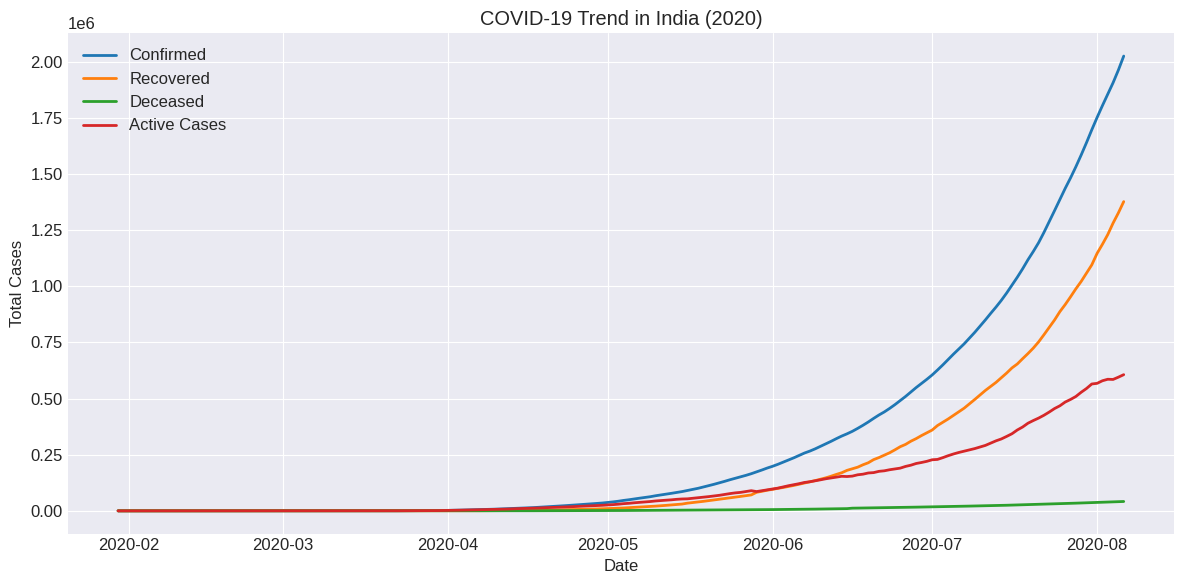

In [36]:
import matplotlib.pyplot as plt
#Plotting a line graph
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Total Confirmed'], label='Confirmed')
plt.plot(df['Date'], df['Total Recovered'], label='Recovered')
plt.plot(df['Date'], df['Total Deceased'], label='Deceased')
plt.plot(df['Date'], df['Active Cases'], label='Active Cases')

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('COVID-19 Trend in India (2020)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


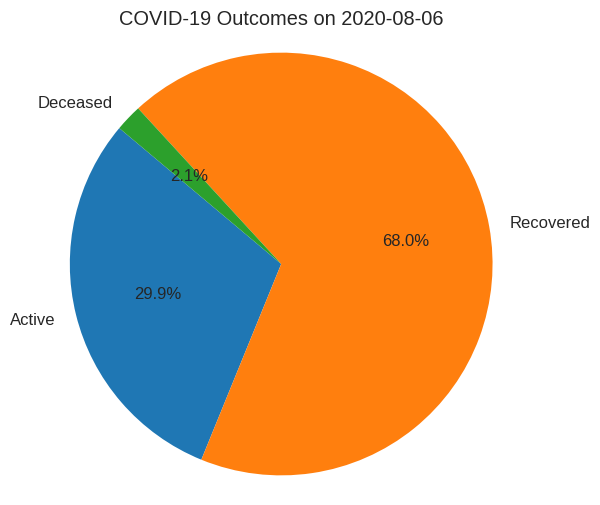

In [37]:
latest = df.iloc[-1]  #  To get last row
labels = ['Active', 'Recovered', 'Deceased']
sizes = [
    latest['Active Cases'],
    latest['Total Recovered'],
    latest['Total Deceased']
]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f"COVID-19 Outcomes on {latest['Date'].date()}")
plt.axis('equal')
plt.show()


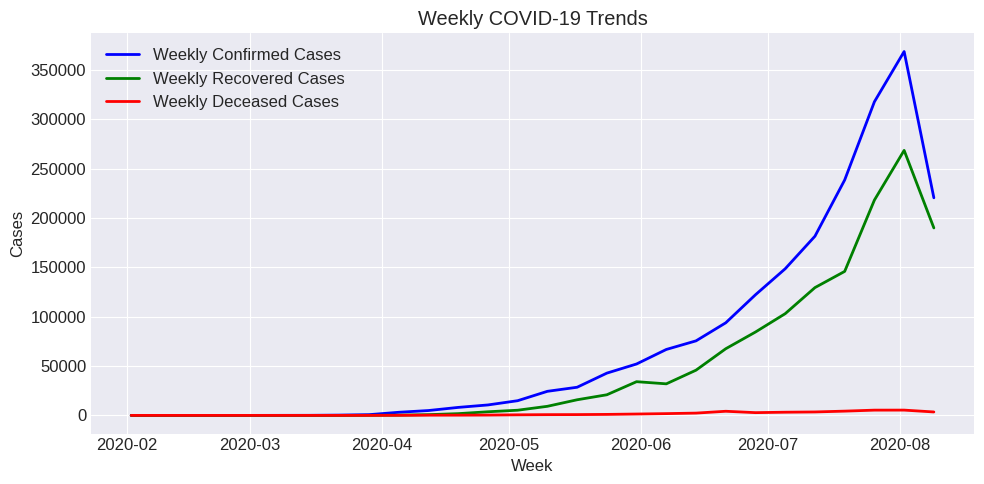

In [38]:
# Set date as index
df.set_index('Date', inplace=True)

# Weekly sums
weekly_df = df.resample('W').sum()

# Plot weekly confirmed cases
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(weekly_df.index, weekly_df['Daily Confirmed'], label='Weekly Confirmed Cases', color='blue')
plt.plot(weekly_df.index, weekly_df['Daily Recovered'], label='Weekly Recovered Cases', color='green')
plt.plot(weekly_df.index, weekly_df['Daily Deceased'], label='Weekly Deceased Cases', color='red')

plt.title('Weekly COVID-19 Trends')
plt.xlabel('Week')
plt.ylabel('Cases')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [39]:
print("Confirmed > 100:")
print(df[df['Total Confirmed'] > 100].head(1))

print("\nDeaths > 10:")
print(df[df['Total Deceased'] > 10].head(1))

print("\nRecovery rate > 80%:")
print(df[df['Recovery Rate'] > 0.8].head(1))


Confirmed > 100:
            Daily Confirmed  Total Confirmed  Daily Recovered  \
Date                                                            
2020-03-14               11              102                0   

            Total Recovered  Daily Deceased  Total Deceased  Active Cases  \
Date                                                                        
2020-03-14               10               1               2            90   

            Recovery Rate  Mortality Rate  
Date                                       
2020-03-14       0.098039        0.019608  

Deaths > 10:
            Daily Confirmed  Total Confirmed  Daily Recovered  \
Date                                                            
2020-03-25               86              657                3   

            Total Recovered  Daily Deceased  Total Deceased  Active Cases  \
Date                                                                        
2020-03-25               43               1              11

In [40]:
# Reset index
df = df.reset_index()

peak_cases = df.loc[df['Daily Confirmed'].idxmax()]
peak_recovered = df.loc[df['Daily Recovered'].idxmax()]
peak_deaths = df.loc[df['Daily Deceased'].idxmax()]

print("📌 Peak Daily Confirmed Cases:")
print(peak_cases[['Date', 'Daily Confirmed']])
print("\n📌 Peak Daily Recovered Cases:")
print(peak_recovered[['Date', 'Daily Recovered']])
print("\n📌 Peak Daily Deaths:")
print(peak_deaths[['Date', 'Daily Deceased']])


📌 Peak Daily Confirmed Cases:
Date               2020-08-06 00:00:00
Daily Confirmed                  62170
Name: 189, dtype: object

📌 Peak Daily Recovered Cases:
Date               2020-08-01 00:00:00
Daily Recovered                  51368
Name: 184, dtype: object

📌 Peak Daily Deaths:
Date              2020-06-16 00:00:00
Daily Deceased                   2004
Name: 138, dtype: object


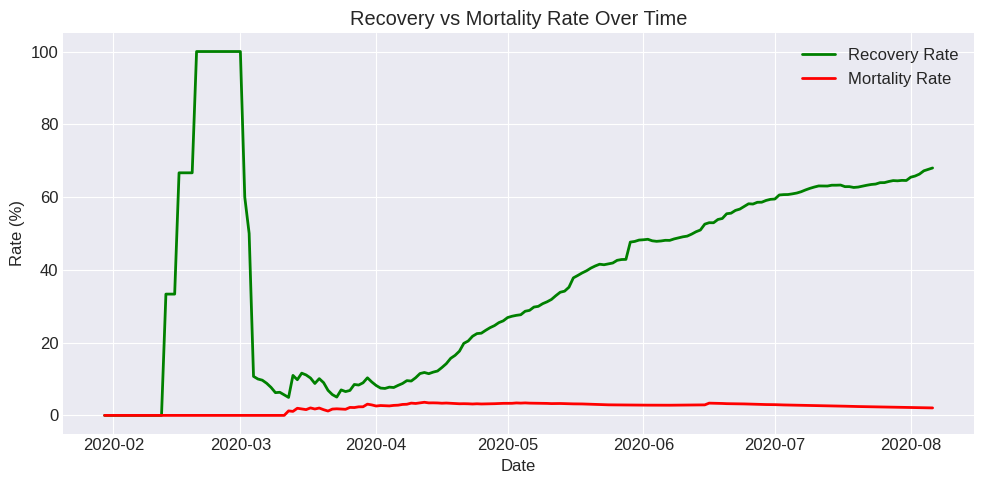

In [41]:
#PLotting key metrics
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Recovery Rate'] * 100, label='Recovery Rate', color='green')
plt.plot(df['Date'], df['Mortality Rate'] * 100, label='Mortality Rate', color='red')

plt.title('Recovery vs Mortality Rate Over Time')
plt.ylabel('Rate (%)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


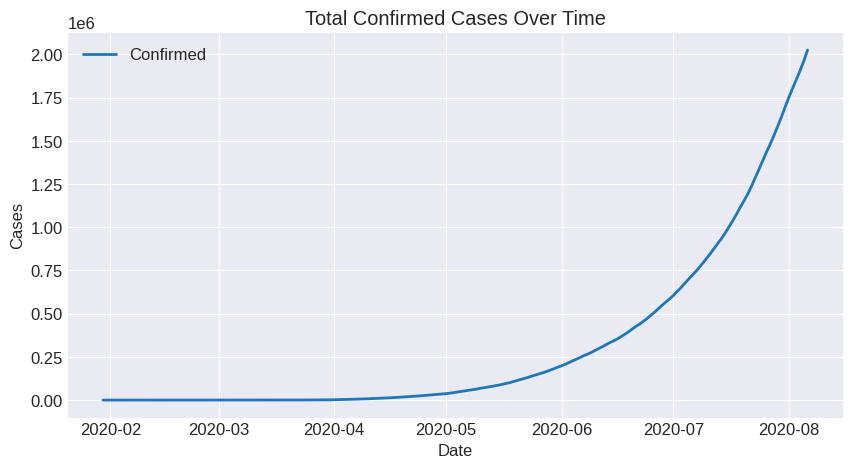

In [42]:
#Total confirmed cases
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Total Confirmed'], label='Confirmed')
plt.title('Total Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)

plt.savefig('/content/confirmed_trend.png')  # Save image
plt.show()


In [43]:
#Final Analysis
latest = df.iloc[-1]
print("📊 Final Summary:")
print(f"Total Confirmed Cases: {latest['Total Confirmed']}")
print(f"Total Recovered: {latest['Total Recovered']}")
print(f"Total Deaths: {latest['Total Deceased']}")
print(f"Active Cases: {latest['Active Cases']}")
print(f"Recovery Rate: {latest['Recovery Rate']:.2%}")
print(f"Mortality Rate: {latest['Mortality Rate']:.2%}")


📊 Final Summary:
Total Confirmed Cases: 2025423
Total Recovered: 1377275
Total Deaths: 41653
Active Cases: 606495
Recovery Rate: 68.00%
Mortality Rate: 2.06%


In [44]:
df.to_csv('/content/covid19_cleaned_final.csv', index=False)
print("Cleaned dataset saved!")


Cleaned dataset saved!
